In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from cvxopt import matrix, solvers
from soccer import soccer_game
from qlearner import QLearner
from friendq import FriendQ
from foeq import FoeQ

In [7]:
#Q_1[71][4][0]
#and (c) re- flect player A’s Q-values corresponding to state s, with player A taking action S and player B sticking.

from scipy.linalg import block_diag

In [10]:
def epsilon_greedy(learner, env, s, epsilon):
    if np.random.rand()<epsilon:
        return env.random_action()
    else:
        return learner.select_action(s)
    
def learning(learner, env, 
             epsilon=1, epsilon_decay=0.9995, epsilon_min=0.001, 
             alpha=1, alpha_decay=0.9995, alpha_min=0.001, 
             gamma = 0.9,
             max_episode=10000):
    
    hist = [0]
    errors = []
    for i in tqdm(range(max_episode)):
        s = env.reset()
        done = False
        while not done:
            action = epsilon_greedy(learner, env, s, epsilon)
            next_s, r, done, info = env.step(action)
            learner.update(s, next_s, action, r, done, alpha, gamma)
            #if s==71 and action==(0,4):
            #    print(i,env.total_step,learner.log_value())
            s = next_s
            
        epsilon = max(epsilon*epsilon_decay, epsilon_min)
        alpha = max(alpha*alpha_decay, alpha_min)
        
        errors.append(np.abs(learner.log_value()-hist[-1]))
        hist.append(learner.log_value())
#         #print(learner.log_value())
#         if i%1000 == 0:
#              print(i, alpha, errors[-1])
        
    return hist, errors

In [186]:
        Q_states = Q2[0]
        s = block_diag(Q_states - Q_states[0, :], Q_states - Q_states[1, :], Q_states - Q_states[2, :], Q_states - Q_states[3, :], Q_states - Q_states[4, :])
        row_index = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23]
        parameters_1 = s[row_index, :]

        # subset the condition for player B
        Q_states = Q2[1].T
        s = block_diag(Q_states - Q_states[0, :], Q_states - Q_states[1, :], Q_states - Q_states[2, :], Q_states - Q_states[3, :], Q_states - Q_states[4, :])
        col_index = [0, 5, 10, 15, 20, 1, 6, 11, 16, 21, 2, 7, 12, 17, 22, 3, 8, 13, 18, 23, 4, 9, 14, 19, 24]
        parameters_2 = s[row_index, :][:, col_index]

        c = matrix((Q2[0] + Q2[1]).reshape(25))
        # construct rationality constraints
        G = matrix(np.append(np.append(parameters_1, parameters_2, axis=0), -np.eye(25), axis=0))
        h = matrix(np.zeros(65) * 0.0)
        # construct probability constraints
        A = matrix(np.ones((1, 25)))
        b = matrix(1.0)

In [199]:
np.sum(np.abs(learner.c-np.array(c)))

54.024415016392666

In [193]:
np.array(G)[23]

array([-0.04732391,  0.        ,  0.        ,  0.        ,  0.        ,
        0.67126039,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.38969246,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.11383188,  0.        ,  0.        ,  0.        ,  0.        ,
        0.37181858,  0.        ,  0.        ,  0.        ,  0.        ])

In [254]:
#s = block_diag(Q_states - Q_states[0, :], Q_states - Q_states[1, :], Q_states - Q_states[2, :], Q_states - Q_states[3, :], Q_states - Q_states[4, :])
s = block_diag(Q_states - Q_states[0,:], Q_states - Q_states[:,1], Q_states - Q_states[:,2], Q_states - Q_states[:,3], Q_states - Q_states[:,4])
col_index = [0, 5, 10, 15, 20, 1, 6, 11, 16, 21, 2, 7, 12, 17, 22, 3, 8, 13, 18, 23, 4, 9, 14, 19, 24]
parameters_2 = s[row_index, :][:, col_index]

In [49]:
def simple_slice(arr, val, inds, axis):
    # this does the same as np.take() except only supports simple slicing, not
    # advanced indexing, and thus is much faster
    sl = [slice(None)] * arr.ndim
    sl[axis] = inds
    #print(tuple(sl))
    arr[tuple(sl)] = val
    
Q = q_table_b_at_state

i = 1
nA = (5,5)
nc = nA[i]*(nA[i]-1)
nprob = np.product(nA)
#Q = np.random.random(nA)

rational_c = np.zeros([nc]+list(nA))

for a in range(nA[i]):
    Q0 = np.take(Q, a, axis=i)
    Q0 = np.expand_dims(Q0, axis=i)
    constraint = np.delete(Q - Q0, a, axis=i)
    #print(constraint)
    constraint = np.moveaxis(constraint, i, 0)
    #print(constraint.shape)
    #print(G[(nA[i]-1)*a:(nA[i]-1)*(a+1)].shape)
    simple_slice(rational_c[(nA[i]-1)*a:(nA[i]-1)*(a+1)], constraint, a, axis=i+1)
rational_c = rational_c.reshape(nc, -1)
print(rational_c.shape)

(20, 25)


In [105]:
Q2 = [np.random.rand(5,5),np.random.rand(5,5)]

In [176]:
            goal=0
            q_table_a_at_state = Q2[0]
            q_table_b_at_state = Q2[1]

            # probabilities must be >=0 25 variables for actions x actions
            probability_constraints = np.eye(25)
            # constraints for picking one action over another in q_table_a
            q_a_constraints = []
            # constraints for picking one action over another in q_table_b
            q_b_constraints = []

            for i in range(5):
                q_temp = []
                for j in range(5):
                    if i != j:
                        # constraints of picking one action over another
                        q_temp.append(q_table_a_at_state[i, :] - q_table_a_at_state[j, :])
                q_a_constraints.append(q_temp)

            row1 = np.hstack((np.vstack(q_a_constraints[0]), np.zeros((4, 20))))
            row2 = np.hstack((np.zeros((4, 5)), np.vstack(q_a_constraints[1]), np.zeros((4, 15))))
            row3 = np.hstack((np.zeros((4, 10)), np.vstack(q_a_constraints[2]), np.zeros((4, 10))))
            row4 = np.hstack((np.zeros((4, 15)), np.vstack(q_a_constraints[3]), np.zeros((4, 5))))
            row5 = np.hstack((np.zeros((4, 20)), np.vstack(q_a_constraints[4])))
            player_a_constraint_matrix = np.vstack((row1, row2, row3, row4, row5))

            for j in range(5):
                q_temp = []
                for i in range(5):
                    if i != j:
                        temp = q_table_b_at_state[:, j] - q_table_b_at_state[:, i]
                        q_temp.append(temp.T)
                q_b_constraints.append(q_temp)

            row1 = np.hstack((np.vstack(q_b_constraints[0]), np.zeros((4, 20))))
            row2 = np.hstack((np.zeros((4, 5)), np.vstack(q_b_constraints[1]), np.zeros((4, 15))))
            row3 = np.hstack((np.zeros((4, 10)), np.vstack(q_b_constraints[2]), np.zeros((4, 10))))
            row4 = np.hstack((np.zeros((4, 15)), np.vstack(q_b_constraints[3]), np.zeros((4, 5))))
            row5 = np.hstack((np.zeros((4, 20)), np.vstack(q_b_constraints[4])))
            player_b_constraint_matrix = np.vstack((row1, row2, row3, row4, row5))
            
            player_b_constraint_matrix = player_b_constraint_matrix.reshape(20,5,5)
            player_b_constraint_matrix = np.moveaxis(player_b_constraint_matrix, 1, -1)
            player_b_constraint_matrix = player_b_constraint_matrix.reshape(20,25)

            player_constraints = np.vstack((player_a_constraint_matrix, player_b_constraint_matrix,probability_constraints))

            # Gx = h
            G = matrix(player_constraints * -1)
            h = matrix(np.zeros(player_constraints.shape[0]))

            # C = np.zeros(25)
            # minimize Cx
            C = np.add(q_table_a_at_state, q_table_b_at_state).reshape(1, 25)
            C *= -1
            C = matrix(C[0])

            # Ax = b
            A = matrix(np.ones((1, 25)))
            b = matrix([1.])

            result = solvers.lp(C, G, h, A, b)['x']
            if result is not None:
                result_array = np.array(result)
                q_a_table_flatten = q_table_a_at_state.flatten().reshape(25, 1)
                q_b_table_flatten = q_table_b_at_state.flatten().reshape(25, 1)

                # Utilitarian CE maximizes sum of player's rewards
                max_a = 0 if goal else sum(result_array * q_b_table_flatten)
                max_b = 0 if goal else sum(result_array * q_a_table_flatten)

In [182]:
learner.agents[1].V[71]

0.9665042818182211

In [153]:
np.sum(np.abs(learner.G-np.array(G))), learner.p[71]

(53.35309363313347,
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]))

In [180]:
max_a, max_b

(array([0.96650428]), array([0.88605528]))

In [130]:
result_array

array([[-5.32998844e-09],
       [-1.84407809e-09],
       [ 2.30875692e-08],
       [-4.57771753e-09],
       [-1.14418105e-09],
       [ 1.07563969e-09],
       [-2.13040105e-09],
       [-1.23596630e-09],
       [ 8.85648557e-01],
       [ 1.14351386e-01],
       [-4.91650471e-09],
       [ 1.43366515e-08],
       [ 1.44542018e-08],
       [ 1.61598230e-08],
       [-2.45918088e-09],
       [ 4.69357981e-09],
       [ 9.00539782e-09],
       [ 4.68236114e-10],
       [-1.51075817e-09],
       [-9.26501159e-10],
       [ 2.51948669e-10],
       [ 3.09930666e-09],
       [ 2.68986006e-10],
       [-4.49153936e-09],
       [ 5.50331405e-10]])

In [109]:
learner.agents[1].V[71]

0.9408623206797078

In [110]:
max_a, max_b

(array([0.6432136]), array([0.77634618]))

In [121]:
np.array(G)

array([[-0.12169573, -0.47598534, -0.83475025, ..., -0.        ,
        -0.        , -0.        ],
       [-0.88550414, -0.34133711, -0.56735439, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.07845559, -0.46103916, -0.05416609, ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -0.        , ..., -1.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -1.        , -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -1.        ]])

In [ ]:
from scipy.linalg import block_diag

Q_states = np.random.rand(5,5)
s = block_diag(Q_states - Q_states[0, :], Q_states - Q_states[1, :], Q_states - Q_states[2, :], Q_states - Q_states[3, :], Q_states - Q_states[4, :])
row_index = [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23]
parameters_1 = s[row_index, :]

# subset the condition for player B
Q_states = Q_2[state[0]][state[1]][state[2]]
s = block_diag(Q_states - Q_states[0, :], Q_states - Q_states[1, :], Q_states - Q_states[2, :], Q_states - Q_states[3, :], Q_states - Q_states[4, :])
col_index = [0, 5, 10, 15, 20, 1, 6, 11, 16, 21, 2, 7, 12, 17, 22, 3, 8, 13, 18, 23, 4, 9, 14, 19, 24]
parameters_2 = s[row_index, :][:, col_index]

c = matrix((Q_1[state[0]][state[1]][state[2]] + Q_2[state[0]][state[1]][state[2]].T).reshape(25))
# construct rationality constraints
G = matrix(np.append(np.append(parameters_1, parameters_2, axis=0), -np.eye(25), axis=0))
h = matrix(np.zeros(65) * 0.0)
# construct probability constraints
A = matrix(np.ones((1, 25)))
b = matrix(1.0)

In [326]:
a,b = np.zeros([10,3]), np.zeros([10,3])
np.vstack([a,b]).shape

(20, 3)

In [355]:
matrix(np.array([0.0]*65))

<65x1 matrix, tc='d'>

In [354]:
matrix(np.zeros(65) * 0.0)

<65x1 matrix, tc='d'>

In [8]:
def put_by_axis(arr, val, inds, axis):
    """
        Assign value to arr at inds, axis=axis
        for example arr = array(3,4,5), val = array(3,5)
        put_by_axis(arr, val, ind=2, axis=1) will do arr[:,2,:] = val
    """ 
    sl = [slice(None)] * arr.ndim
    sl[axis] = inds
    #print(tuple(sl))
    arr[tuple(sl)] = val

class ceQ():
    class agent():
        def __init__(self, nS, nA, i):
            self.i = i
            self.nA = nA
            self.na = nA[i]
            #self.Q = np.ones([nS]+list(nA)) # nstate, player1 action, player2 action ...
            self.Q = np.random.sample([nS]+list(nA))
            self.V = np.zeros([nS])
            
        def get_rational_constraint(self, s):
            #print("agent",self.i)
            #self.Q[s] = Q2[self.i]

            nc = self.na*(self.na-1)

            rational_c = np.zeros([nc]+list(self.nA))

            for a in range(self.na):
                #print("a",a)
                #print(self.Q[s].shape, a, self.i)
                Q0 = np.take(self.Q[s], a, axis=self.i)
                Q0 = np.expand_dims(Q0, axis=self.i)
                constraint = np.delete(self.Q[s] - Q0, a, axis=self.i)
                #print(constraint)
                constraint = np.moveaxis(constraint, self.i, 0)
                #print("constraint shape",constraint.shape)
                #print("rational_c shape", rational_c[(nA[i]-1)*a:(nA[i]-1)*(a+1)].shape)
                put_by_axis(rational_c[(self.na-1)*a:(self.na-1)*(a+1)], constraint, a, axis=self.i+1)
            
            rational_c = rational_c.reshape(nc, -1)
            #self.c = rational_c
            return rational_c
        
        def update_Q(self, s, next_s, a, r, done, alpha, gamma):
            self.Q[s][a] = (1-alpha)*self.Q[s][a] + alpha*(r+gamma*self.V[next_s])
            
    def __init__(self, nS, nA):
        self.nA = nA
        self.NA = np.prod(self.nA)
        self.agents = [self.agent(nS, nA, i) for i in range(len(nA))]
        self.p = np.ones([nS, self.NA])/self.NA
        
    def solve(self, s, solver="glpk"):
        G = np.vstack([agent.get_rational_constraint(s) for agent in self.agents])
        G = np.vstack([G, -np.eye(self.NA)])
        h = np.array([0.0]*G.shape[0])
        c = -sum(agent.Q[s] for agent in self.agents).flatten()
        G, h, c = matrix(G), matrix(h), matrix(c)
        A = matrix(np.ones((1, self.NA)))
        b = matrix(1.0)
        
        #sol = solvers.lp(c=c, G=G, h=h, A=A, b=b, solver=solver)
        sol = solvers.lp(c=c, G=G, h=h, A=A, b=b)
        if not sol["x"]:
            print("fail in LP")
            return
            
        self.p[s] = np.abs(np.array(sol["x"])).flatten()
        self.p[s] = self.p[s]/sum(self.p[s])
            
        for agent in self.agents:
            agent.V[s] = np.dot(agent.Q[s].flatten(), self.p[s])
            
#         print(s)
#         self.G = np.array(G)
#         self.h = np.array(h)
#         self.A = np.array(A)
#         self.b = np.array(b)
#         self.c = np.array(c)
#         raise ValueError()
            
    def select_action(self, s):
        idx = np.random.choice(range(len(self.p[s])), p=self.p[s])
        return np.unravel_index(idx, self.nA)
    
    def update(self, s, next_s, action, reward, done, alpha, gamma):
        for r, agent in zip(reward, self.agents):
            agent.update_Q(s, next_s, action, r, done, alpha, gamma)
            
        self.solve(s)
        
    def log_value(self):
        # player A taking action S(4) and player B stick(0)
        # agent1.Q[s][4][0] or agent2.Q[s][4][0]
        return self.agents[0].Q[71][4][0]+self.agents[0].Q[71][4][3]

In [87]:
env = soccer_game()
learner_ceQ = ceQ(env.nS, env.nA)

hist_ceQ, errors_ceQ = learning(learner_ceQ, env, epsilon_decay=0.999, alpha_decay=0.999, max_episode=10000)

100%|██████████| 10000/10000 [07:58<00:00, 20.92it/s]


(0, 0.5)

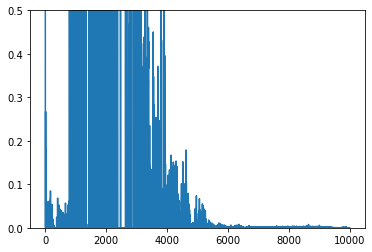

In [100]:
plt.plot(errors_ceQ)
plt.ylim(0,0.5)

In [101]:
Qtabel_ceQ = [learner_ceQ.agents[0].Q, learner_ceQ.agents[1].Q]

In [102]:
p = learner_ceQ.p[71].reshape(5,5)
p.sum(axis=0).round(2), p.sum(axis=1).round(2)

(array([0.  , 0.  , 0.  , 0.52, 0.48]), array([0.  , 0.  , 0.  , 0.63, 0.37]))

In [52]:
env = soccer_game()
learner_q = QLearner(env.nS, env.nA)

hist_q, errors_q = learning(learner_q, env, epsilon_decay=0.9995, alpha_decay=0.9995, max_episode=50000)

100%|██████████| 50000/50000 [00:21<00:00, 2348.20it/s]


(0, 0.5)

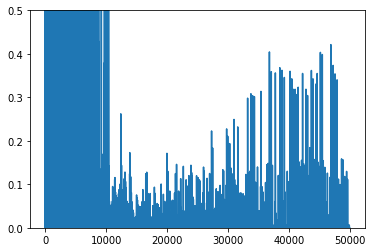

In [89]:
plt.plot(errors_q)
plt.ylim(0,0.5)

In [25]:
env = soccer_game()
learner_friendQ = FriendQ(env.nS, env.nA)

hist_friendQ, errors_friendQ = learning(learner_friendQ, env, epsilon_decay=0.999, alpha_decay=0.999, max_episode=1000)

100%|██████████| 1000/1000 [00:00<00:00, 3295.52it/s]


(0, 0.5)

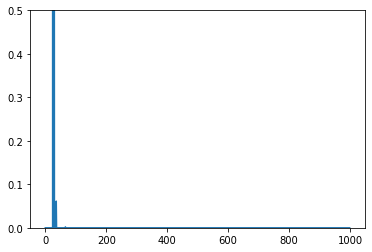

In [90]:
plt.plot(errors_friendQ)
plt.ylim(0,0.5)

In [34]:
learner_friendQ.agents[0].Q[71].round(), learner_friendQ.agents[1].Q[71].round()

(array([[ 90., 100.,  81.,  90.,  90.],
        [ 90., 100.,  87.,  90.,  90.],
        [ 90., 100., -49.,  90.,  90.],
        [ 90., 100.,  81.,  90.,  90.],
        [ 90., 100.,  81.,  90.,  90.]]),
 array([[  85., -100.,   90.,   86.,   81.],
        [  85., -100.,   87.,   84.,   81.],
        [  81., -100.,   97.,   81.,   81.],
        [  84., -100.,   90.,   86.,   81.],
        [  81., -100.,   89.,   81.,   85.]]))

In [30]:
learner_friendQ.agents[1].select_action(71)

2

In [103]:
env = soccer_game()
learner_foeQ = FoeQ(env.nS, env.nA)

hist_foeQ, errors_foeQ = learning(learner_foeQ, env, epsilon_decay=0.999, alpha_decay=0.999, max_episode=10000)

100%|██████████| 10000/10000 [00:26<00:00, 373.29it/s]


(0, 0.5)

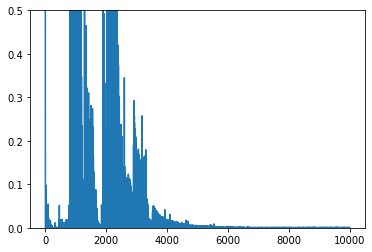

In [104]:
plt.plot(errors_foeQ)
plt.ylim(0,0.5)

In [107]:
# stick left right up down
learner_foeQ.agent1.Q[71].round()

array([[-15., -15., -31., -15., -39.],
       [100., 100., 100., 100., 100.],
       [  1.,  -7., -91.,   1., -44.],
       [-14., -14., -31., -15., -39.],
       [-35., -19., -33., -35.,  -8.]])

In [108]:
learner_foeQ.agent1.p[71].round(2),  learner_foeQ.agent2.p[71].round(2)

(array([0.  , 0.88, 0.  , 0.  , 0.12]), array([0.3, 0. , 0. , 0. , 0.7]))

In [94]:
Qtable_foeQ = [learner_foeQ.agent1.Q, learner_foeQ.agent2.Q]

In [97]:
np.round(Qtabel_ceQ[0][71]-Qtable_foeQ[0][71].T, 2)

array([[ 10.05,  -0.  ,   0.76,   3.9 ,   3.9 ],
       [  4.7 ,   0.  ,  -4.9 ,   7.39,   2.06],
       [ -7.44,   0.  ,  -2.85,  -2.83,   0.49],
       [  6.87,   0.  ,   0.22,  -0.64,   0.88],
       [  3.1 ,  -0.  , -29.12,  -2.15,  -0.73]])